In [1]:
# Importamos las librerías necesarias
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparación de datos para implementar métodos de ensamble

In [2]:
# Cargamos el dataset
df = pd.read_csv('../Data/heart.csv')
df['target'].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [3]:
# Extraemos las variables independientes y la variable dependiente
X = df.drop(['target'], axis=1)
y = df['target']

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Implementación de Bagging

In [4]:
# Evaluamos las diferencias del modelo KNN con y sin Bagging

# KNN sin Bagging
knn_class = KNeighborsClassifier().fit(X_train, y_train)
knn_pred = knn_class.predict(X_test)
print('Accuracy KNN: ', accuracy_score(knn_pred, y_test))

# KNN con Bagging
knn_bag_class = BaggingClassifier(KNeighborsClassifier(), n_estimators=50).fit(X_train, y_train)
knn_bag_pred = knn_bag_class.predict(X_test)
print('Accuracy KNN con Bagging: ', accuracy_score(knn_bag_pred, y_test))

Accuracy KNN:  0.7047353760445683
Accuracy KNN con Bagging:  0.7520891364902507


In [7]:
# Evaluamos las diferencias de los demás modelos con y sin Bagging
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings('ignore')

# Creamos un diccionario con los modelos a evaluar
classifiers = {
        'LogisticRegression': LogisticRegression(),
        'LinearSCV': LinearSVC(),
        'SVC': SVC(),
        'SGDC': SGDClassifier(),
        'DecisionTree': DecisionTreeClassifier()
    }

# Iteramos sobre el diccionario para evaluar los modelos
for name, classifier in classifiers.items():
    # sin Bagging
    model_class = classifier.fit(X_train, y_train)
    model_pred = model_class.predict(X_test)
    print(f'Accuracy {name}: ', accuracy_score(model_pred, y_test))
    # con Bagging
    model_bag_class = BaggingClassifier(classifier, n_estimators=50).fit(X_train, y_train)
    model_bag_pred = model_bag_class.predict(X_test)
    print(f'Accuracy {name} con Bagging: ', accuracy_score(model_bag_pred, y_test))
    print('-'*50)

Accuracy LogisticRegression:  0.8495821727019499
Accuracy LogisticRegression con Bagging:  0.8495821727019499
--------------------------------------------------
Accuracy LinearSCV:  0.6935933147632312
Accuracy LinearSCV con Bagging:  0.8440111420612814
--------------------------------------------------
Accuracy SVC:  0.7298050139275766
Accuracy SVC con Bagging:  0.7465181058495822
--------------------------------------------------
Accuracy SGDC:  0.6545961002785515
Accuracy SGDC con Bagging:  0.754874651810585
--------------------------------------------------
Accuracy DecisionTree:  1.0
Accuracy DecisionTree con Bagging:  1.0
--------------------------------------------------


# Implementación de Boosting

In [11]:
# Implementamos el modelo de Boosting
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)
boost_pred = boost.predict(X_test)
print('GradientBoostingClassifier accuracy: ', accuracy_score(boost_pred, y_test))

GradientBoostingClassifier accuracy:  0.9275766016713092


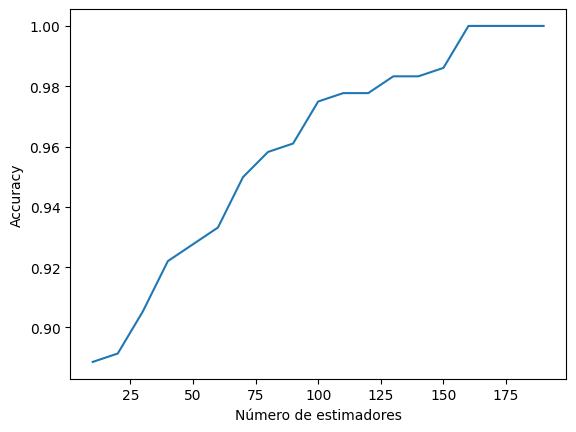

In [13]:
# Graficamos para encontrar el mejor número de estimadores
import matplotlib.pyplot as plt

# Creamos una lista con los valores de los estimadores
estimators = range(10, 200, 10)

# Creamos una lista vacía para almacenar los resultados
results = []

# Iteramos sobre la lista de estimadores
for estimator in estimators:
    # Creamos el modelo
    model = GradientBoostingClassifier(n_estimators=estimator).fit(X_train, y_train)
    # Evaluamos el modelo
    model_pred = model.predict(X_test)
    # Almacenamos el resultado
    results.append(accuracy_score(model_pred, y_test))

# Graficamos los resultados
plt.plot(estimators, results)
plt.xlabel('Número de estimadores')
plt.ylabel('Accuracy');